In [1]:
import sys
import pandas as pd 
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
%matplotlib inline

In [2]:
parent_dir = os.path.abspath(r'D:')
output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

big_train_path = os.path.join(output_dir, 'big_train.parquet')
big_train_df = pd.read_parquet(big_train_path)

big_test_path = os.path.join(output_dir, 'big_test.parquet')
big_test_df = pd.read_parquet(big_test_path)



In [3]:
columns_to_drop = [
    'wind_speed_mean', 'yaw_error_mean', 'Turbulence',
    'tip_deflection_edge_V1_mean', 'tip_deflection_edge_V2_mean',
    'tip_deflection_edge_V3_mean', 'tip_deflection_flap_V1_mean',
    'tip_deflection_flap_V2_mean', 'tip_deflection_flap_V3_mean',
    'tower_deflection_Y_mean', 'tower_deflection_Z_mean',
    'wind_speed_max', 'wind_speed_median', 'wind_speed_min',
    'wind_speed_q1', 'wind_speed_q3', 'wind_speed_std',
    'yaw_error_max', 'yaw_error_median', 'yaw_error_min',
    'yaw_error_q1', 'yaw_error_q3', 'yaw_error_std',
    'tip_deflection_edge_V1_max', 'tip_deflection_edge_V1_median',
    'tip_deflection_edge_V1_min', 'tip_deflection_edge_V1_q1',
    'tip_deflection_edge_V1_q3', 'tip_deflection_edge_V1_std',
    'tip_deflection_edge_V2_max', 'tip_deflection_edge_V2_median',
    'tip_deflection_edge_V2_min', 'tip_deflection_edge_V2_q1',
    'tip_deflection_edge_V2_q3', 'tip_deflection_edge_V2_std',
    'tip_deflection_edge_V3_max', 'tip_deflection_edge_V3_median',
    'tip_deflection_edge_V3_min', 'tip_deflection_edge_V3_q1',
    'tip_deflection_edge_V3_q3', 'tip_deflection_edge_V3_std',
    'tip_deflection_flap_V1_max', 'tip_deflection_flap_V1_median',
    'tip_deflection_flap_V1_min', 'tip_deflection_flap_V1_q1',
    'tip_deflection_flap_V1_q3', 'tip_deflection_flap_V1_std',
    'tip_deflection_flap_V2_max', 'tip_deflection_flap_V2_median',
    'tip_deflection_flap_V2_min', 'tip_deflection_flap_V2_q1',
    'tip_deflection_flap_V2_q3', 'tip_deflection_flap_V2_std',
    'tip_deflection_flap_V3_max', 'tip_deflection_flap_V3_median',
    'tip_deflection_flap_V3_min', 'tip_deflection_flap_V3_q1',
    'tip_deflection_flap_V3_q3', 'tip_deflection_flap_V3_std',
    'tower_deflection_Y_max', 'tower_deflection_Y_median',
    'tower_deflection_Y_min', 'tower_deflection_Y_q1',
    'tower_deflection_Y_q3', 'tower_deflection_Y_std',
    'tower_deflection_Z_max', 'tower_deflection_Z_median',
    'tower_deflection_Z_min', 'tower_deflection_Z_q1',
    'tower_deflection_Z_q3', 'tower_deflection_Z_std'
]

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y


Learning rate set to 0.078607
0:	learn: 5.7790292	total: 163ms	remaining: 2m 42s
1:	learn: 5.3367983	total: 189ms	remaining: 1m 34s
2:	learn: 4.9280478	total: 219ms	remaining: 1m 12s
3:	learn: 4.5551837	total: 245ms	remaining: 1m
4:	learn: 4.2090547	total: 272ms	remaining: 54.1s
5:	learn: 3.8884280	total: 298ms	remaining: 49.4s
6:	learn: 3.5928128	total: 324ms	remaining: 46s
7:	learn: 3.3226015	total: 353ms	remaining: 43.7s
8:	learn: 3.0709855	total: 379ms	remaining: 41.8s
9:	learn: 2.8385465	total: 406ms	remaining: 40.2s
10:	learn: 2.6244306	total: 432ms	remaining: 38.9s
11:	learn: 2.4282400	total: 459ms	remaining: 37.8s
12:	learn: 2.2452894	total: 484ms	remaining: 36.8s
13:	learn: 2.0764194	total: 510ms	remaining: 35.9s
14:	learn: 1.9207771	total: 536ms	remaining: 35.2s
15:	learn: 1.7794151	total: 563ms	remaining: 34.6s
16:	learn: 1.6469367	total: 589ms	remaining: 34.1s
17:	learn: 1.5259024	total: 614ms	remaining: 33.5s
18:	learn: 1.4147562	total: 639ms	remaining: 33s
19:	learn: 1.31

168:	learn: 0.0969187	total: 4.39s	remaining: 21.6s
169:	learn: 0.0967338	total: 4.41s	remaining: 21.5s
170:	learn: 0.0964911	total: 4.43s	remaining: 21.5s
171:	learn: 0.0963618	total: 4.45s	remaining: 21.4s
172:	learn: 0.0961163	total: 4.48s	remaining: 21.4s
173:	learn: 0.0957789	total: 4.5s	remaining: 21.4s
174:	learn: 0.0956450	total: 4.52s	remaining: 21.3s
175:	learn: 0.0953924	total: 4.54s	remaining: 21.3s
176:	learn: 0.0952181	total: 4.57s	remaining: 21.2s
177:	learn: 0.0949454	total: 4.59s	remaining: 21.2s
178:	learn: 0.0946784	total: 4.61s	remaining: 21.2s
179:	learn: 0.0942468	total: 4.64s	remaining: 21.1s
180:	learn: 0.0939953	total: 4.67s	remaining: 21.1s
181:	learn: 0.0937777	total: 4.69s	remaining: 21.1s
182:	learn: 0.0935698	total: 4.72s	remaining: 21.1s
183:	learn: 0.0933046	total: 4.75s	remaining: 21s
184:	learn: 0.0931514	total: 4.77s	remaining: 21s
185:	learn: 0.0929075	total: 4.79s	remaining: 21s
186:	learn: 0.0927224	total: 4.81s	remaining: 20.9s
187:	learn: 0.09248

333:	learn: 0.0713978	total: 8.51s	remaining: 17s
334:	learn: 0.0713037	total: 8.54s	remaining: 16.9s
335:	learn: 0.0712328	total: 8.56s	remaining: 16.9s
336:	learn: 0.0711599	total: 8.59s	remaining: 16.9s
337:	learn: 0.0710994	total: 8.62s	remaining: 16.9s
338:	learn: 0.0710335	total: 8.64s	remaining: 16.9s
339:	learn: 0.0709051	total: 8.67s	remaining: 16.8s
340:	learn: 0.0708198	total: 8.69s	remaining: 16.8s
341:	learn: 0.0707172	total: 8.72s	remaining: 16.8s
342:	learn: 0.0706144	total: 8.75s	remaining: 16.8s
343:	learn: 0.0705478	total: 8.78s	remaining: 16.7s
344:	learn: 0.0704614	total: 8.8s	remaining: 16.7s
345:	learn: 0.0703654	total: 8.83s	remaining: 16.7s
346:	learn: 0.0703095	total: 8.85s	remaining: 16.7s
347:	learn: 0.0702733	total: 8.88s	remaining: 16.6s
348:	learn: 0.0701470	total: 8.91s	remaining: 16.6s
349:	learn: 0.0700484	total: 8.94s	remaining: 16.6s
350:	learn: 0.0699145	total: 8.96s	remaining: 16.6s
351:	learn: 0.0697783	total: 8.99s	remaining: 16.6s
352:	learn: 0.0

495:	learn: 0.0583235	total: 12.6s	remaining: 12.8s
496:	learn: 0.0582370	total: 12.6s	remaining: 12.8s
497:	learn: 0.0581833	total: 12.6s	remaining: 12.7s
498:	learn: 0.0581295	total: 12.7s	remaining: 12.7s
499:	learn: 0.0581074	total: 12.7s	remaining: 12.7s
500:	learn: 0.0580248	total: 12.7s	remaining: 12.7s
501:	learn: 0.0579889	total: 12.7s	remaining: 12.6s
502:	learn: 0.0579088	total: 12.8s	remaining: 12.6s
503:	learn: 0.0578284	total: 12.8s	remaining: 12.6s
504:	learn: 0.0578018	total: 12.8s	remaining: 12.6s
505:	learn: 0.0577479	total: 12.8s	remaining: 12.5s
506:	learn: 0.0576980	total: 12.9s	remaining: 12.5s
507:	learn: 0.0576389	total: 12.9s	remaining: 12.5s
508:	learn: 0.0576120	total: 12.9s	remaining: 12.5s
509:	learn: 0.0575716	total: 12.9s	remaining: 12.4s
510:	learn: 0.0575493	total: 13s	remaining: 12.4s
511:	learn: 0.0574953	total: 13s	remaining: 12.4s
512:	learn: 0.0574337	total: 13s	remaining: 12.3s
513:	learn: 0.0573786	total: 13s	remaining: 12.3s
514:	learn: 0.057330

661:	learn: 0.0499704	total: 16.7s	remaining: 8.53s
662:	learn: 0.0499236	total: 16.7s	remaining: 8.5s
663:	learn: 0.0498739	total: 16.8s	remaining: 8.48s
664:	learn: 0.0498386	total: 16.8s	remaining: 8.45s
665:	learn: 0.0497991	total: 16.8s	remaining: 8.43s
666:	learn: 0.0497609	total: 16.8s	remaining: 8.4s
667:	learn: 0.0497082	total: 16.9s	remaining: 8.38s
668:	learn: 0.0496644	total: 16.9s	remaining: 8.35s
669:	learn: 0.0496502	total: 16.9s	remaining: 8.33s
670:	learn: 0.0496160	total: 16.9s	remaining: 8.3s
671:	learn: 0.0495995	total: 17s	remaining: 8.28s
672:	learn: 0.0495242	total: 17s	remaining: 8.25s
673:	learn: 0.0494818	total: 17s	remaining: 8.22s
674:	learn: 0.0494421	total: 17s	remaining: 8.2s
675:	learn: 0.0493961	total: 17.1s	remaining: 8.17s
676:	learn: 0.0493729	total: 17.1s	remaining: 8.15s
677:	learn: 0.0493329	total: 17.1s	remaining: 8.12s
678:	learn: 0.0492923	total: 17.1s	remaining: 8.1s
679:	learn: 0.0492630	total: 17.2s	remaining: 8.07s
680:	learn: 0.0492418	tot

828:	learn: 0.0440771	total: 20.8s	remaining: 4.29s
829:	learn: 0.0440437	total: 20.8s	remaining: 4.26s
830:	learn: 0.0440302	total: 20.8s	remaining: 4.24s
831:	learn: 0.0439909	total: 20.9s	remaining: 4.21s
832:	learn: 0.0439578	total: 20.9s	remaining: 4.19s
833:	learn: 0.0439344	total: 20.9s	remaining: 4.16s
834:	learn: 0.0438856	total: 20.9s	remaining: 4.14s
835:	learn: 0.0438633	total: 21s	remaining: 4.11s
836:	learn: 0.0438387	total: 21s	remaining: 4.09s
837:	learn: 0.0438160	total: 21s	remaining: 4.06s
838:	learn: 0.0437738	total: 21s	remaining: 4.04s
839:	learn: 0.0437486	total: 21.1s	remaining: 4.01s
840:	learn: 0.0437292	total: 21.1s	remaining: 3.99s
841:	learn: 0.0437021	total: 21.1s	remaining: 3.96s
842:	learn: 0.0436677	total: 21.1s	remaining: 3.94s
843:	learn: 0.0436419	total: 21.2s	remaining: 3.91s
844:	learn: 0.0436135	total: 21.2s	remaining: 3.89s
845:	learn: 0.0435965	total: 21.2s	remaining: 3.86s
846:	learn: 0.0435739	total: 21.2s	remaining: 3.84s
847:	learn: 0.043543

991:	learn: 0.0397659	total: 24.8s	remaining: 200ms
992:	learn: 0.0397363	total: 24.8s	remaining: 175ms
993:	learn: 0.0397114	total: 24.8s	remaining: 150ms
994:	learn: 0.0396877	total: 24.9s	remaining: 125ms
995:	learn: 0.0396533	total: 24.9s	remaining: 99.9ms
996:	learn: 0.0396382	total: 24.9s	remaining: 74.9ms
997:	learn: 0.0396254	total: 24.9s	remaining: 50ms
998:	learn: 0.0396119	total: 24.9s	remaining: 25ms
999:	learn: 0.0395848	total: 25s	remaining: 0us
Target: wind_speed_mean
Training MAE: 0.030749101257136063
Training MSE: 0.0015669559039339768
Training RMSE: 0.039584793847309306
Training R2: 0.9999599894298131

Test MAE: 0.03922347295663304
Test MSE: 0.0025929915323202202
Test RMSE: 0.050921425081395945
Test R2: 0.9999301313727511



C:\Users\musab\AppData\Local\Temp\ipykernel_15748\1119323724.py:109: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\musab\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


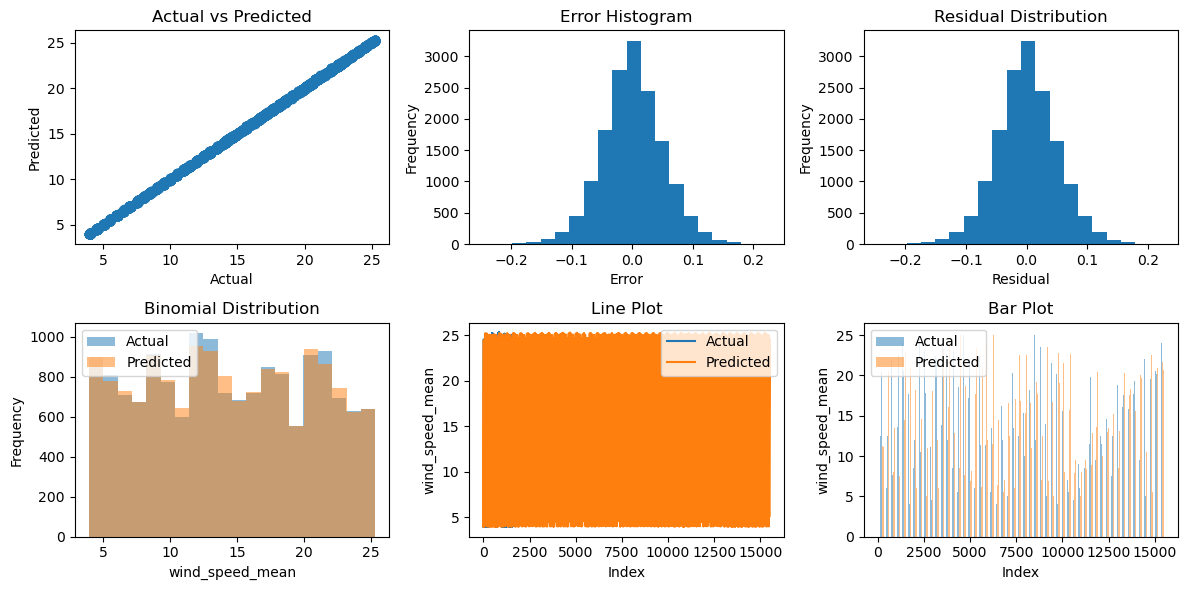

C:\Users\musab\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\musab\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Learning rate set to 0.078607
0:	learn: 10.9242389	total: 34.4ms	remaining: 34.3s
1:	learn: 10.0895012	total: 63.8ms	remaining: 31.8s
2:	learn: 9.3110661	total: 94ms	remaining: 31.2s
3:	learn: 8.5975610	total: 124ms	remaining: 30.9s
4:	learn: 7.9468835	total: 154ms	remaining: 30.7s
5:	learn: 7.3356011	total: 182ms	remaining: 30.1s
6:	learn: 6.7703696	total: 211ms	remaining: 29.9s
7:	learn: 6.2521098	total: 240ms	remaining: 29.8s
8:	learn: 5.7842609	total: 268ms	remaining: 29.5s
9:	learn: 5.3407358	total: 297ms	remaining: 29.4s
10:	learn: 4.9310166	total: 329ms	remaining: 29.6s
11:	learn: 4.5514342	total: 357ms	remaining: 29.4s
12:	learn: 4.2064906	total: 386ms	remaining: 29.3s
13:	learn: 3.8922627	total: 415ms	remaining: 29.2s
14:	learn: 3.5952307	total: 443ms	remaining: 29.1s
15:	learn: 3.3235247	total: 474ms	remaining: 29.1s
16:	learn: 3.0737831	total: 502ms	remaining: 29.1s
17:	learn: 2.8398717	total: 533ms	remaining: 29.1s
18:	learn: 2.6253550	total: 563ms	remaining: 29.1s
19:	lear

166:	learn: 0.1317894	total: 4.85s	remaining: 24.2s
167:	learn: 0.1316266	total: 4.88s	remaining: 24.2s
168:	learn: 0.1313378	total: 4.9s	remaining: 24.1s
169:	learn: 0.1311752	total: 4.94s	remaining: 24.1s
170:	learn: 0.1304109	total: 4.97s	remaining: 24.1s
171:	learn: 0.1301184	total: 5s	remaining: 24.1s
172:	learn: 0.1298197	total: 5.03s	remaining: 24s
173:	learn: 0.1296475	total: 5.05s	remaining: 24s
174:	learn: 0.1295042	total: 5.08s	remaining: 23.9s
175:	learn: 0.1293665	total: 5.1s	remaining: 23.9s
176:	learn: 0.1292051	total: 5.13s	remaining: 23.9s
177:	learn: 0.1290787	total: 5.16s	remaining: 23.8s
178:	learn: 0.1286945	total: 5.18s	remaining: 23.8s
179:	learn: 0.1282495	total: 5.21s	remaining: 23.7s
180:	learn: 0.1280383	total: 5.23s	remaining: 23.7s
181:	learn: 0.1278131	total: 5.25s	remaining: 23.6s
182:	learn: 0.1275533	total: 5.28s	remaining: 23.6s
183:	learn: 0.1273155	total: 5.3s	remaining: 23.5s
184:	learn: 0.1271931	total: 5.33s	remaining: 23.5s
185:	learn: 0.1268013	

331:	learn: 0.0924060	total: 9.39s	remaining: 18.9s
332:	learn: 0.0922327	total: 9.41s	remaining: 18.9s
333:	learn: 0.0920960	total: 9.44s	remaining: 18.8s
334:	learn: 0.0920385	total: 9.47s	remaining: 18.8s
335:	learn: 0.0919563	total: 9.49s	remaining: 18.8s
336:	learn: 0.0917270	total: 9.52s	remaining: 18.7s
337:	learn: 0.0916571	total: 9.55s	remaining: 18.7s
338:	learn: 0.0914805	total: 9.57s	remaining: 18.7s
339:	learn: 0.0913439	total: 9.6s	remaining: 18.6s
340:	learn: 0.0912010	total: 9.63s	remaining: 18.6s
341:	learn: 0.0911308	total: 9.65s	remaining: 18.6s
342:	learn: 0.0909240	total: 9.68s	remaining: 18.5s
343:	learn: 0.0908731	total: 9.71s	remaining: 18.5s
344:	learn: 0.0905304	total: 9.74s	remaining: 18.5s
345:	learn: 0.0904947	total: 9.77s	remaining: 18.5s
346:	learn: 0.0904202	total: 9.79s	remaining: 18.4s
347:	learn: 0.0901258	total: 9.82s	remaining: 18.4s
348:	learn: 0.0898714	total: 9.85s	remaining: 18.4s
349:	learn: 0.0896061	total: 9.87s	remaining: 18.3s
350:	learn: 0

490:	learn: 0.0728985	total: 13.8s	remaining: 14.3s
491:	learn: 0.0728705	total: 13.8s	remaining: 14.3s
492:	learn: 0.0727857	total: 13.9s	remaining: 14.3s
493:	learn: 0.0726988	total: 13.9s	remaining: 14.2s
494:	learn: 0.0726540	total: 13.9s	remaining: 14.2s
495:	learn: 0.0724010	total: 14s	remaining: 14.2s
496:	learn: 0.0723151	total: 14s	remaining: 14.2s
497:	learn: 0.0722730	total: 14s	remaining: 14.1s
498:	learn: 0.0722244	total: 14s	remaining: 14.1s
499:	learn: 0.0720816	total: 14.1s	remaining: 14.1s
500:	learn: 0.0720415	total: 14.1s	remaining: 14s
501:	learn: 0.0719486	total: 14.1s	remaining: 14s
502:	learn: 0.0717918	total: 14.2s	remaining: 14s
503:	learn: 0.0717404	total: 14.2s	remaining: 14s
504:	learn: 0.0716764	total: 14.2s	remaining: 13.9s
505:	learn: 0.0716494	total: 14.2s	remaining: 13.9s
506:	learn: 0.0716144	total: 14.3s	remaining: 13.9s
507:	learn: 0.0715771	total: 14.3s	remaining: 13.8s
508:	learn: 0.0715535	total: 14.3s	remaining: 13.8s
509:	learn: 0.0714886	total:

650:	learn: 0.0627500	total: 18.3s	remaining: 9.79s
651:	learn: 0.0627226	total: 18.3s	remaining: 9.76s
652:	learn: 0.0627035	total: 18.3s	remaining: 9.73s
653:	learn: 0.0625935	total: 18.4s	remaining: 9.71s
654:	learn: 0.0624733	total: 18.4s	remaining: 9.69s
655:	learn: 0.0623577	total: 18.4s	remaining: 9.66s
656:	learn: 0.0623247	total: 18.4s	remaining: 9.63s
657:	learn: 0.0622763	total: 18.5s	remaining: 9.6s
658:	learn: 0.0621239	total: 18.5s	remaining: 9.57s
659:	learn: 0.0619745	total: 18.5s	remaining: 9.54s
660:	learn: 0.0619199	total: 18.6s	remaining: 9.52s
661:	learn: 0.0618914	total: 18.6s	remaining: 9.49s
662:	learn: 0.0618597	total: 18.6s	remaining: 9.46s
663:	learn: 0.0618204	total: 18.6s	remaining: 9.43s
664:	learn: 0.0617624	total: 18.7s	remaining: 9.4s
665:	learn: 0.0617249	total: 18.7s	remaining: 9.38s
666:	learn: 0.0616685	total: 18.7s	remaining: 9.35s
667:	learn: 0.0616031	total: 18.8s	remaining: 9.32s
668:	learn: 0.0615715	total: 18.8s	remaining: 9.3s
669:	learn: 0.0

811:	learn: 0.0549160	total: 23.2s	remaining: 5.36s
812:	learn: 0.0548357	total: 23.2s	remaining: 5.34s
813:	learn: 0.0548042	total: 23.2s	remaining: 5.31s
814:	learn: 0.0547780	total: 23.3s	remaining: 5.28s
815:	learn: 0.0547308	total: 23.3s	remaining: 5.25s
816:	learn: 0.0547144	total: 23.3s	remaining: 5.22s
817:	learn: 0.0546409	total: 23.4s	remaining: 5.2s
818:	learn: 0.0546086	total: 23.4s	remaining: 5.17s
819:	learn: 0.0545629	total: 23.4s	remaining: 5.14s
820:	learn: 0.0545449	total: 23.4s	remaining: 5.11s
821:	learn: 0.0545086	total: 23.5s	remaining: 5.08s
822:	learn: 0.0544194	total: 23.5s	remaining: 5.05s
823:	learn: 0.0544006	total: 23.5s	remaining: 5.03s
824:	learn: 0.0543444	total: 23.6s	remaining: 5s
825:	learn: 0.0542961	total: 23.6s	remaining: 4.97s
826:	learn: 0.0542205	total: 23.6s	remaining: 4.94s
827:	learn: 0.0541839	total: 23.7s	remaining: 4.91s
828:	learn: 0.0541387	total: 23.7s	remaining: 4.88s
829:	learn: 0.0540685	total: 23.7s	remaining: 4.86s
830:	learn: 0.05

972:	learn: 0.0495631	total: 28.1s	remaining: 780ms
973:	learn: 0.0495179	total: 28.1s	remaining: 751ms
974:	learn: 0.0494872	total: 28.2s	remaining: 722ms
975:	learn: 0.0494776	total: 28.2s	remaining: 693ms
976:	learn: 0.0494430	total: 28.2s	remaining: 664ms
977:	learn: 0.0494341	total: 28.2s	remaining: 635ms
978:	learn: 0.0494189	total: 28.3s	remaining: 606ms
979:	learn: 0.0493915	total: 28.3s	remaining: 578ms
980:	learn: 0.0493792	total: 28.3s	remaining: 549ms
981:	learn: 0.0493552	total: 28.4s	remaining: 520ms
982:	learn: 0.0493175	total: 28.4s	remaining: 491ms
983:	learn: 0.0492904	total: 28.4s	remaining: 462ms
984:	learn: 0.0492696	total: 28.5s	remaining: 433ms
985:	learn: 0.0492567	total: 28.5s	remaining: 404ms
986:	learn: 0.0492467	total: 28.5s	remaining: 375ms
987:	learn: 0.0492299	total: 28.5s	remaining: 347ms
988:	learn: 0.0492084	total: 28.6s	remaining: 318ms
989:	learn: 0.0491941	total: 28.6s	remaining: 289ms
990:	learn: 0.0491640	total: 28.6s	remaining: 260ms
991:	learn: 

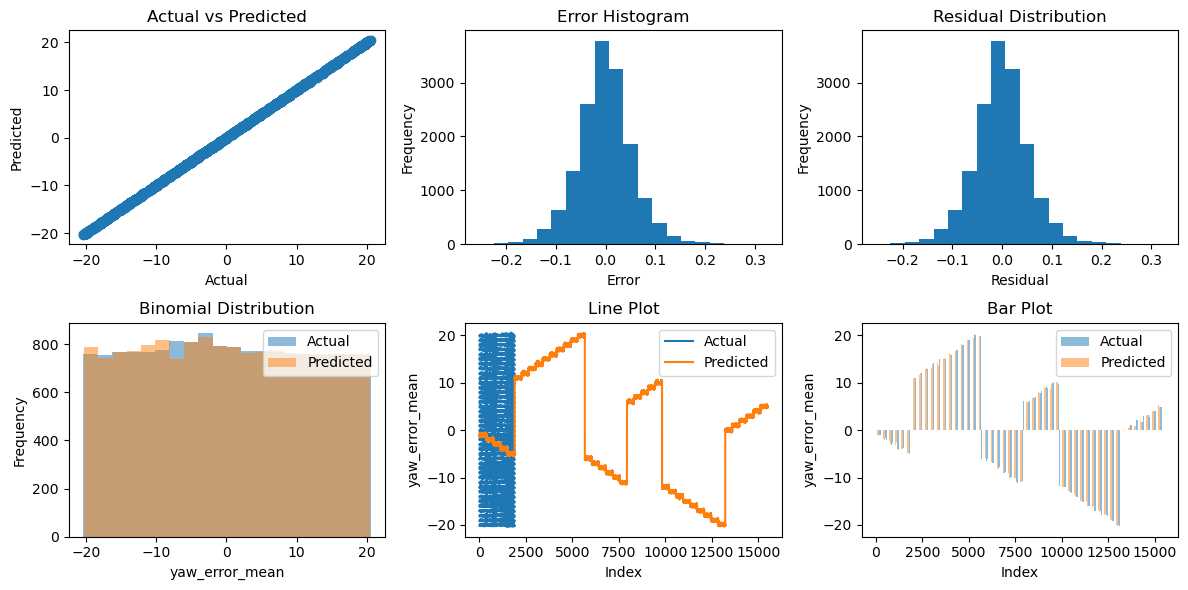

Learning rate set to 0.078607
0:	learn: 0.0258749	total: 38.3ms	remaining: 38.3s
1:	learn: 0.0239175	total: 75.6ms	remaining: 37.7s
2:	learn: 0.0221242	total: 112ms	remaining: 37.3s
3:	learn: 0.0204788	total: 151ms	remaining: 37.6s
4:	learn: 0.0189497	total: 186ms	remaining: 37s
5:	learn: 0.0175671	total: 220ms	remaining: 36.4s
6:	learn: 0.0162650	total: 253ms	remaining: 35.9s
7:	learn: 0.0150440	total: 288ms	remaining: 35.8s
8:	learn: 0.0139165	total: 327ms	remaining: 36s
9:	learn: 0.0128795	total: 362ms	remaining: 35.9s
10:	learn: 0.0119129	total: 403ms	remaining: 36.2s
11:	learn: 0.0110357	total: 435ms	remaining: 35.8s
12:	learn: 0.0102019	total: 471ms	remaining: 35.8s
13:	learn: 0.0094436	total: 505ms	remaining: 35.6s
14:	learn: 0.0087293	total: 543ms	remaining: 35.6s
15:	learn: 0.0080757	total: 578ms	remaining: 35.5s
16:	learn: 0.0074836	total: 611ms	remaining: 35.3s
17:	learn: 0.0069266	total: 646ms	remaining: 35.2s
18:	learn: 0.0064220	total: 680ms	remaining: 35.1s
19:	learn: 0.

165:	learn: 0.0003885	total: 5.28s	remaining: 26.5s
166:	learn: 0.0003870	total: 5.31s	remaining: 26.5s
167:	learn: 0.0003858	total: 5.34s	remaining: 26.5s
168:	learn: 0.0003852	total: 5.37s	remaining: 26.4s
169:	learn: 0.0003844	total: 5.4s	remaining: 26.4s
170:	learn: 0.0003829	total: 5.43s	remaining: 26.3s
171:	learn: 0.0003805	total: 5.46s	remaining: 26.3s
172:	learn: 0.0003783	total: 5.49s	remaining: 26.3s
173:	learn: 0.0003776	total: 5.52s	remaining: 26.2s
174:	learn: 0.0003769	total: 5.55s	remaining: 26.2s
175:	learn: 0.0003761	total: 5.57s	remaining: 26.1s
176:	learn: 0.0003754	total: 5.6s	remaining: 26s
177:	learn: 0.0003741	total: 5.63s	remaining: 26s
178:	learn: 0.0003730	total: 5.67s	remaining: 26s
179:	learn: 0.0003718	total: 5.7s	remaining: 26s
180:	learn: 0.0003691	total: 5.74s	remaining: 26s
181:	learn: 0.0003685	total: 5.77s	remaining: 25.9s
182:	learn: 0.0003676	total: 5.8s	remaining: 25.9s
183:	learn: 0.0003665	total: 5.83s	remaining: 25.9s
184:	learn: 0.0003648	tota

324:	learn: 0.0002470	total: 10.2s	remaining: 21.3s
325:	learn: 0.0002466	total: 10.3s	remaining: 21.2s
326:	learn: 0.0002462	total: 10.3s	remaining: 21.2s
327:	learn: 0.0002457	total: 10.3s	remaining: 21.2s
328:	learn: 0.0002449	total: 10.4s	remaining: 21.1s
329:	learn: 0.0002446	total: 10.4s	remaining: 21.1s
330:	learn: 0.0002437	total: 10.4s	remaining: 21.1s
331:	learn: 0.0002431	total: 10.5s	remaining: 21.1s
332:	learn: 0.0002426	total: 10.5s	remaining: 21s
333:	learn: 0.0002421	total: 10.5s	remaining: 21s
334:	learn: 0.0002414	total: 10.6s	remaining: 21s
335:	learn: 0.0002403	total: 10.6s	remaining: 21s
336:	learn: 0.0002395	total: 10.6s	remaining: 20.9s
337:	learn: 0.0002390	total: 10.7s	remaining: 20.9s
338:	learn: 0.0002388	total: 10.7s	remaining: 20.9s
339:	learn: 0.0002380	total: 10.7s	remaining: 20.8s
340:	learn: 0.0002375	total: 10.8s	remaining: 20.8s
341:	learn: 0.0002371	total: 10.8s	remaining: 20.8s
342:	learn: 0.0002367	total: 10.8s	remaining: 20.7s
343:	learn: 0.000235

489:	learn: 0.0001813	total: 15.7s	remaining: 16.4s
490:	learn: 0.0001810	total: 15.8s	remaining: 16.3s
491:	learn: 0.0001809	total: 15.8s	remaining: 16.3s
492:	learn: 0.0001807	total: 15.8s	remaining: 16.3s
493:	learn: 0.0001804	total: 15.9s	remaining: 16.3s
494:	learn: 0.0001800	total: 15.9s	remaining: 16.2s
495:	learn: 0.0001798	total: 15.9s	remaining: 16.2s
496:	learn: 0.0001793	total: 16s	remaining: 16.2s
497:	learn: 0.0001790	total: 16s	remaining: 16.1s
498:	learn: 0.0001789	total: 16s	remaining: 16.1s
499:	learn: 0.0001787	total: 16.1s	remaining: 16.1s
500:	learn: 0.0001782	total: 16.1s	remaining: 16s
501:	learn: 0.0001778	total: 16.1s	remaining: 16s
502:	learn: 0.0001775	total: 16.2s	remaining: 16s
503:	learn: 0.0001772	total: 16.2s	remaining: 15.9s
504:	learn: 0.0001770	total: 16.2s	remaining: 15.9s
505:	learn: 0.0001767	total: 16.3s	remaining: 15.9s
506:	learn: 0.0001765	total: 16.3s	remaining: 15.9s
507:	learn: 0.0001761	total: 16.3s	remaining: 15.8s
508:	learn: 0.0001758	to

651:	learn: 0.0001446	total: 21.4s	remaining: 11.4s
652:	learn: 0.0001444	total: 21.5s	remaining: 11.4s
653:	learn: 0.0001441	total: 21.5s	remaining: 11.4s
654:	learn: 0.0001440	total: 21.5s	remaining: 11.3s
655:	learn: 0.0001438	total: 21.6s	remaining: 11.3s
656:	learn: 0.0001435	total: 21.6s	remaining: 11.3s
657:	learn: 0.0001431	total: 21.6s	remaining: 11.2s
658:	learn: 0.0001430	total: 21.7s	remaining: 11.2s
659:	learn: 0.0001428	total: 21.7s	remaining: 11.2s
660:	learn: 0.0001426	total: 21.7s	remaining: 11.1s
661:	learn: 0.0001424	total: 21.8s	remaining: 11.1s
662:	learn: 0.0001422	total: 21.8s	remaining: 11.1s
663:	learn: 0.0001420	total: 21.8s	remaining: 11.1s
664:	learn: 0.0001418	total: 21.9s	remaining: 11s
665:	learn: 0.0001416	total: 21.9s	remaining: 11s
666:	learn: 0.0001414	total: 21.9s	remaining: 11s
667:	learn: 0.0001413	total: 22s	remaining: 10.9s
668:	learn: 0.0001412	total: 22s	remaining: 10.9s
669:	learn: 0.0001409	total: 22s	remaining: 10.9s
670:	learn: 0.0001408	to

814:	learn: 0.0001187	total: 26.9s	remaining: 6.12s
815:	learn: 0.0001186	total: 27s	remaining: 6.08s
816:	learn: 0.0001185	total: 27s	remaining: 6.05s
817:	learn: 0.0001183	total: 27s	remaining: 6.01s
818:	learn: 0.0001182	total: 27.1s	remaining: 5.98s
819:	learn: 0.0001180	total: 27.1s	remaining: 5.95s
820:	learn: 0.0001179	total: 27.1s	remaining: 5.91s
821:	learn: 0.0001178	total: 27.2s	remaining: 5.88s
822:	learn: 0.0001177	total: 27.2s	remaining: 5.85s
823:	learn: 0.0001176	total: 27.2s	remaining: 5.81s
824:	learn: 0.0001175	total: 27.2s	remaining: 5.78s
825:	learn: 0.0001174	total: 27.3s	remaining: 5.75s
826:	learn: 0.0001173	total: 27.3s	remaining: 5.71s
827:	learn: 0.0001171	total: 27.3s	remaining: 5.68s
828:	learn: 0.0001169	total: 27.4s	remaining: 5.65s
829:	learn: 0.0001168	total: 27.4s	remaining: 5.61s
830:	learn: 0.0001167	total: 27.4s	remaining: 5.58s
831:	learn: 0.0001167	total: 27.5s	remaining: 5.54s
832:	learn: 0.0001166	total: 27.5s	remaining: 5.51s
833:	learn: 0.0001

978:	learn: 0.0001019	total: 32s	remaining: 687ms
979:	learn: 0.0001019	total: 32s	remaining: 654ms
980:	learn: 0.0001018	total: 32.1s	remaining: 621ms
981:	learn: 0.0001017	total: 32.1s	remaining: 589ms
982:	learn: 0.0001016	total: 32.1s	remaining: 556ms
983:	learn: 0.0001015	total: 32.2s	remaining: 523ms
984:	learn: 0.0001015	total: 32.2s	remaining: 491ms
985:	learn: 0.0001014	total: 32.2s	remaining: 458ms
986:	learn: 0.0001013	total: 32.3s	remaining: 425ms
987:	learn: 0.0001012	total: 32.3s	remaining: 392ms
988:	learn: 0.0001011	total: 32.3s	remaining: 360ms
989:	learn: 0.0001010	total: 32.4s	remaining: 327ms
990:	learn: 0.0001009	total: 32.4s	remaining: 294ms
991:	learn: 0.0001008	total: 32.4s	remaining: 262ms
992:	learn: 0.0001008	total: 32.5s	remaining: 229ms
993:	learn: 0.0001007	total: 32.5s	remaining: 196ms
994:	learn: 0.0001006	total: 32.5s	remaining: 163ms
995:	learn: 0.0001005	total: 32.6s	remaining: 131ms
996:	learn: 0.0001005	total: 32.6s	remaining: 98ms
997:	learn: 0.000

C:\Users\musab\AppData\Local\Temp\ipykernel_15748\1119323724.py:109: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\musab\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


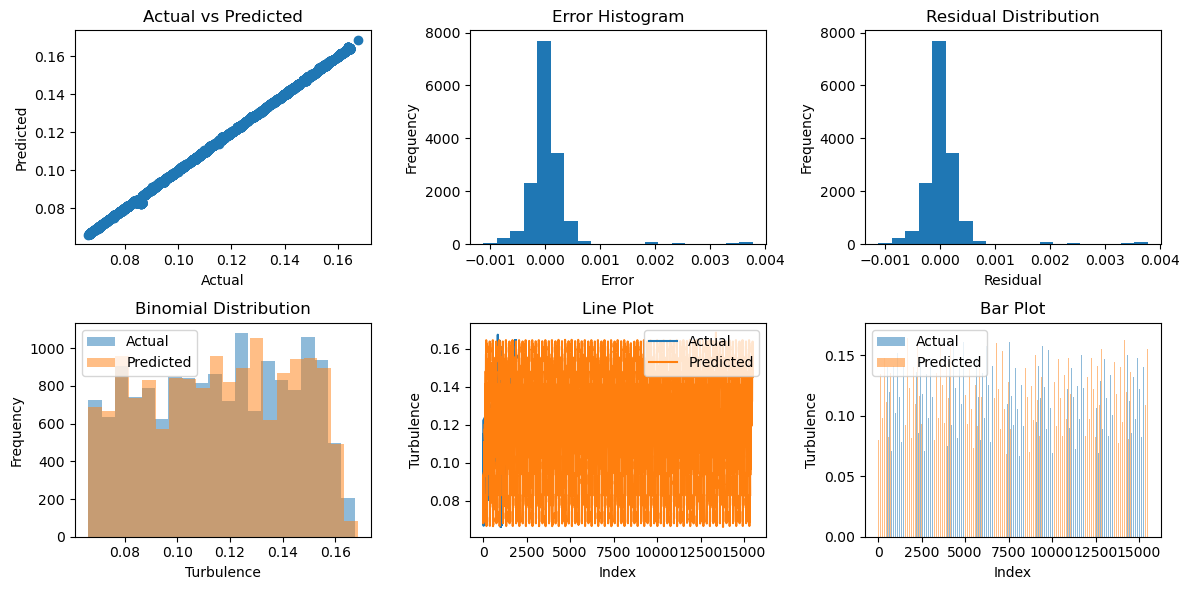

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


targets = ['wind_speed_mean', 'yaw_error_mean', 'Turbulence']

for target in targets:
    mean_target = big_train_df[target].mean()
    big_train_df[target] = big_train_df[target].fillna(mean_target)
    big_test_df[target] = big_test_df[target].fillna(mean_target)

    big_train_df['log_' + target] = np.log(big_train_df[target])
    big_test_df['log_' + target] = np.log(big_test_df[target])

    big_train_df['exp_' + target] = np.exp(big_train_df[target])
    big_test_df['exp_' + target] = np.exp(big_test_df[target])

    big_train_df[target + '_squared'] = big_train_df[target] ** 2
    big_test_df[target + '_squared'] = big_test_df[target] ** 2

    big_train_df[target + '_bin'] = pd.cut(big_train_df[target], bins=5, labels=False)
    big_test_df[target + '_bin'] = pd.cut(big_test_df[target], bins=5, labels=False)

    X_train = big_train_df.drop(target, axis=1)
    y_train = big_train_df[target]

    X_test = big_test_df.drop(target, axis=1)
    y_test = big_test_df[target]

    catboost_model = CatBoostRegressor()

    catboost_model.fit(X_train, y_train)

    train_predictions = catboost_model.predict(X_train)
    test_predictions = catboost_model.predict(X_test)

    train_mae = mean_absolute_error(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, train_predictions)

    test_mae = mean_absolute_error(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, test_predictions)

    print("Target:", target)
    print("Training MAE:", train_mae)
    print("Training MSE:", train_mse)
    print("Training RMSE:", train_rmse)
    print("Training R2:", train_r2)
    print()
    print("Test MAE:", test_mae)
    print("Test MSE:", test_mse)
    print("Test RMSE:", test_rmse)
    print("Test R2:", test_r2)
    print()

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 3, 1)
    plt.scatter(y_test, test_predictions)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')

    plt.subplot(2, 3, 2)
    error = y_test - test_predictions
    plt.hist(error, bins=20)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.title('Error Histogram')

    plt.subplot(2, 3, 3)
    residual = y_test - test_predictions
    plt.hist(residual, bins=20)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Residual Distribution')

    plt.subplot(2, 3, 4)
    plt.hist(y_test, bins=20, alpha=0.5, label='Actual')
    plt.hist(test_predictions, bins=20, alpha=0.5, label='Predicted')
    plt.xlabel(target)
    plt.ylabel('Frequency')
    plt.title('Binomial Distribution')
    plt.legend()

    plt.subplot(2, 3, 5)
    plt.plot(y_test, label='Actual')
    plt.plot(test_predictions, label='Predicted')
    plt.xlabel('Index')
    plt.ylabel(target)
    plt.title('Line Plot')
    plt.legend()

    plt.subplot(2, 3, 6)
    index = np.arange(len(y_test))
    plt.bar(index, y_test, width=0.3, alpha=0.5, label='Actual')
    plt.bar(index + 0.3, test_predictions, width=0.3, alpha=0.5, label='Predicted')
    plt.xlabel('Index')
    plt.ylabel(target)
    plt.title('Bar Plot')
    plt.legend()

    plt.tight_layout()
    plt.show()
